In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

titanic=pd.read_csv('/kaggle/input/titanic/train.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
titanic.sort_values(by=["Sex","Fare"],ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
...,...,...,...,...,...,...,...,...,...,...,...,...
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
fem_survival=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
fem_survival.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


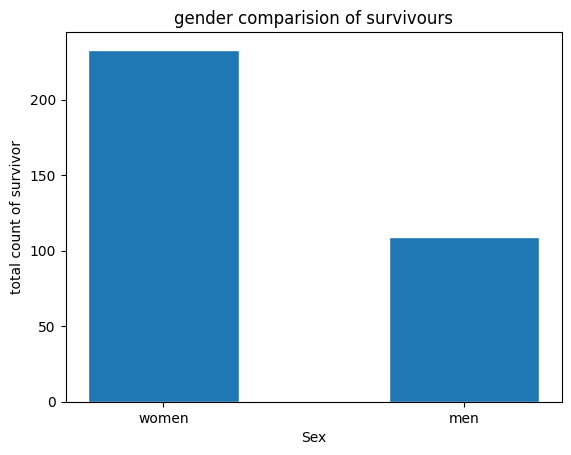

In [5]:
import matplotlib.pyplot as plt

women=titanic[titanic['Sex']=='female']
men=titanic[titanic['Sex']=='male']

women_survived = women['Survived'].sum()
men_survived = men['Survived'].sum()

fig, ax=plt.subplots()
ax.bar(['women','men'],[women_survived,men_survived],width=0.5,edgecolor="white")
ax.set_xlabel('Sex')
ax.set_ylabel('total count of survivor')
ax.set_title('gender comparision of survivours')
plt.show()

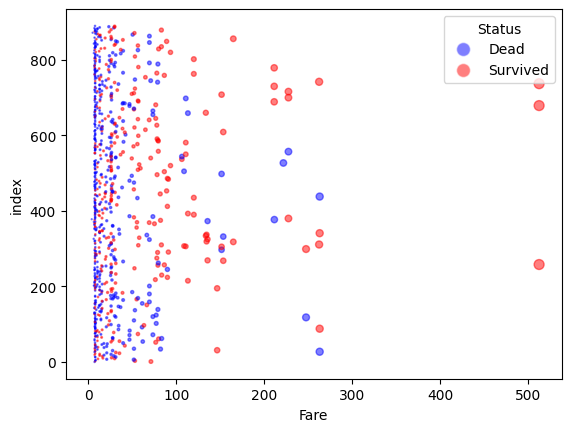

In [6]:
survived =titanic['Survived']
fare=titanic['Fare']
size=titanic['Fare']*0.1
color=titanic['Survived'].map({0:'blue',1:'red'})
fig,ax=plt.subplots()

ax.scatter(titanic['Fare'],titanic.index, s=size, c=color, alpha=0.5)

ax.set_xlabel('Fare')
ax.set_ylabel('index')
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Dead', markersize=10, markerfacecolor='blue', alpha=0.5),
    Line2D([0], [0], marker='o', color='w', label='Survived', markersize=10, markerfacecolor='red', alpha=0.5)
]
ax.legend(handles=legend_elements, title='Status')

plt.show()

In [7]:
total_e=titanic['Embarked'].value_counts()
survived = titanic[titanic['Survived'] == 1]
survived_e=survived['Embarked']
total_se=survived_e.value_counts()
total_s=survived.shape[0]
print(total_se)
print(total_e)

Embarked
S    217
C     93
Q     30
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the datasets
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

# Define target and features
y = train_data['Survived']
features = ["Sex", "Fare", "Embarked"]

# Handle missing values (example: filling missing fare with median, embarked with mode)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Align the train and test data to have the same dummy variables
X, X_test = X.align(X_test, join='left', axis=1)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

# Make predictions
predictions = model.predict(X_test)

# Create output DataFrame and save to CSV
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


/tmp/ipykernel_18/2054983722.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
/tmp/ipykernel_18/2054983722.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

Your submission was successfully saved!
